In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sms_spam_collection.csv")
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# preprocessing 1: lowercase

df['message'] = df['message'].apply(lambda x: x.lower())
df.head()

,label,message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [4]:
# preprocessing 2: removing contractions

contractions_dict = {     
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I had",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

In [5]:
import re

contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())), flags=re.IGNORECASE | re.DOTALL)

In [6]:
#prosedur repacement contractions : 
# cari contractions nya
# cari replacement nya di dictionary nya
# replcace dengan versi bakunya

text_contoh = "yes:)from last week itself i'm taking live call."

temp_contractions_extracted = contractions_pattern.findall(string=text_contoh) #melakukan pencarian untuk contractions/singkatan
for contractions in temp_contractions_extracted: #untuk setiap singkatan yang ditemukan, akan di replace
    if contractions in contractions_dict.keys(): #kalau kita punya penggantinya, akan kita replace.
        print(contractions_pattern.sub(contractions_dict[contractions], text_contoh)) #prosedur penggantian

yes:)from last week itself I am taking live call.


In [7]:
def contraction_replacement(input_text):
    temp_contractions_extracted = contractions_pattern.findall(string=input_text) #melakukan pencarian untuk contractions/singkatan
    if len(temp_contractions_extracted)>0:
        for contractions in temp_contractions_extracted: #untuk setiap singkatan yang ditemukan, akan di replace
            if contractions in contractions_dict.keys(): #kalau kita punya penggantinya, akan kita replace.
                return(contractions_pattern.sub(contractions_dict[contractions], input_text)) #prosedur penggantian
            else:
                return input_text
    else:
        return input_text

In [8]:
df['message'] = df['message'].apply(contraction_replacement)
df.head()

,label,message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i do not think he goes to usf, he lives ar..."


In [9]:
#preprocessing text step 3: remove or convert number into text

text_contoh = "saya lahir di 2025"
print(re.sub(pattern= r'[^a-zA-Z ]', repl='', string=text_contoh))

saya lahir di 


In [10]:
df['message'] = df['message'].apply(lambda x: re.sub(pattern= r'[^a-zA-Z ]', repl='', string=x))
df['message'] = df['message'].apply(lambda x: re.sub(pattern= r'\s{2,}', repl=' ', string=x))
df['message'] = df['message'].apply(lambda x: x.strip())
df.head()

,label,message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor u c already then say
4,ham,nah i do not think he goes to usf he lives aro...


In [11]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Richard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Richard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [13]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([w for w in nltk.word_tokenize(sentence) if w not in stop_words])

In [15]:
df['message'] = df['message'].apply(lambda x: remove_stopwords(x))
df.head()

,label,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though


Processing part 2

In [16]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer(language="english", ignore_stopwords=True)

In [17]:
text_contoh = "care caring cares daring dareful successful careful goes going gone"
print(stemmer.stem(text_contoh)) #ga bisa dipake

care caring cares daring dareful successful careful goes going gon


In [18]:
#cara menggunakan snowball stemmer yang dirancang untuk 1 kata, jadi untuk 1 paragraf
# split each words berdasarkan spasi
# stem each words
# join words into kalimat

temp_text_contoh = text_contoh.split(sep=" ") #split each words berdasarkan spasi
text_hasil_stem = " ".join([stemmer.stem(x) for x in temp_text_contoh]) #stemming dan menyatukan kembali jadi 1 kalimat
print(text_contoh)
print(text_hasil_stem)
print(set(text_hasil_stem.split()))

care caring cares daring dareful successful careful goes going gone
care care care dare dare success care goe go gone
{'goe', 'success', 'dare', 'go', 'gone', 'care'}


In [19]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Richard\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
lematizer = WordNetLemmatizer()
print(lematizer.lemmatize(text_contoh))

care caring cares daring dareful successful careful goes going gone


In [21]:
from nltk.tokenize import word_tokenize

stemmer.stem(word_tokenize("convincing")[0])

'convinc'

In [22]:
#cara menggunakan WordNetLemmatizer yang dirancang untuk 1 kata, jadi untuk 1 paragraf
# split each words berdasarkan spasi
# stem each words
# join words into kalimat

temp_text_contoh = word_tokenize(text_contoh) #split each words berdasarkan spasi
text_hasil_stem = " ".join([lematizer.lemmatize(x) for x in temp_text_contoh]) #stemming dan menyatukan kembali jadi 1 kalimat
print(text_contoh)
print(text_hasil_stem)
print(set(text_hasil_stem.split()))

care caring cares daring dareful successful careful goes going gone
care caring care daring dareful successful careful go going gone
{'dareful', 'successful', 'caring', 'daring', 'going', 'go', 'gone', 'care', 'careful'}


In [23]:
df.head()

,label,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though


In [24]:
def fungsi_stemmer(input_text):
    temp_text_contoh = word_tokenize(input_text) #split each words berdasarkan spasi
    text_hasil_stem = " ".join([stemmer.stem(x) for x in temp_text_contoh]) #stemming dan menyatukan kembali jadi 1 kalimat
    return text_hasil_stem

def fungsi_lemmatizer(input_text):
    temp_text_contoh = word_tokenize(input_text) #split each words berdasarkan spasi
    text_hasil_stem = " ".join([lematizer.lemmatize(x) for x in temp_text_contoh]) #stemming dan menyatukan kembali jadi 1 kalimat
    return text_hasil_stem

In [25]:
df['message_stem'] = df['message'].apply(lambda x: fungsi_stemmer(x))
df['message_lemma'] = df['message'].apply(lambda x: fungsi_lemmatizer(x))
df.head()

,label,message,message_stem,message_lemma
0,ham,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though


Preprocessing: Bikin bag of words

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

test_countvectorizer = CountVectorizer(ngram_range=(1, 3)).fit(corpus)
test_countvectorizer.get_feature_names_out()

array(['and', 'and this', 'and this is', 'document', 'document is',
       'document is the', 'first', 'first document', 'is', 'is the',
       'is the first', 'is the second', 'is the third', 'is this',
       'is this the', 'one', 'second', 'second document', 'the',
       'the first', 'the first document', 'the second',
       'the second document', 'the third', 'the third one', 'third',
       'third one', 'this', 'this document', 'this document is',
       'this is', 'this is the', 'this the', 'this the first'],
      dtype=object)

In [28]:
hasil_countvectorizer = test_countvectorizer.transform(corpus)
print(hasil_countvectorizer.toarray())

[[0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0]
 [0 0 0 2 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0]
 [1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0]
 [0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1]]


In [29]:
test_dataframe_hasil_transformation = pd.DataFrame(
    data = hasil_countvectorizer.toarray(),
    columns=test_countvectorizer.get_feature_names_out()
)
test_dataframe_hasil_transformation.head()

,and,and this,and this is,document,document is,document is the,first,first document,is,is the,...,the third one,third,third one,this,this document,this document is,this is,this is the,this the,this the first
0,0,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,1,0,0
1,0,0,0,2,1,1,0,0,1,1,...,0,0,0,1,1,1,0,0,0,0
2,1,1,1,0,0,0,0,0,1,1,...,1,1,1,1,0,0,1,1,0,0
3,0,0,0,1,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,1,1


Perhitungan TF-IDF

In [30]:
#tfidf(word, doc) = tf(word) log((N+1)/(Nw+1)) + 1
#Nw = jumlah document dimana kata-katanya muncul, atau count secara vertikal
#N number of doc in training set



def tfidf(input_dataframe):
    nilai_N = len(input_dataframe)
    output_tf_idf = input_dataframe.copy()
    for i in range(0, len(input_dataframe.columns)):
        nilai_NW = input_dataframe[input_dataframe>0].iloc[:,i].count()
        for j in range(0, len(input_dataframe.iloc[:,i])):
            try:
                nilai_tf_idf = input_dataframe.iloc[j,i]*(np.log((nilai_N+1)/(nilai_NW+1))+1)
                output_tf_idf.iloc[j,i] = nilai_tf_idf
            except:
                print(input_dataframe.iloc[j,i])
    return output_tf_idf

hasil_tf_idf = tfidf(test_dataframe_hasil_transformation)

In [31]:
hasil_tf_idf.head()

,and,and this,and this is,document,document is,document is the,first,first document,is,is the,...,the third one,third,third one,this,this document,this document is,this is,this is the,this the,this the first
0,0.000000,0.000000,0.000000,1.223144,0.000000,0.000000,1.510826,1.510826,1,1.223144,...,0.000000,0.000000,0.000000,1,0.000000,0.000000,1.510826,1.510826,0.000000,0.000000
1,0.000000,0.000000,0.000000,2.446287,1.916291,1.916291,0.000000,0.000000,1,1.223144,...,0.000000,0.000000,0.000000,1,1.916291,1.916291,0.000000,0.000000,0.000000,0.000000
2,1.916291,1.916291,1.916291,0.000000,0.000000,0.000000,0.000000,0.000000,1,1.223144,...,1.916291,1.916291,1.916291,1,0.000000,0.000000,1.510826,1.510826,0.000000,0.000000
3,0.000000,0.000000,0.000000,1.223144,0.000000,0.000000,1.510826,1.510826,1,0.000000,...,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000,0.000000,1.916291,1.916291


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
tfidf_sklearn = TfidfVectorizer(ngram_range=(1,3), norm=None).fit(corpus)

In [34]:
tfidf_sklearn.get_feature_names_out()

array(['and', 'and this', 'and this is', 'document', 'document is',
       'document is the', 'first', 'first document', 'is', 'is the',
       'is the first', 'is the second', 'is the third', 'is this',
       'is this the', 'one', 'second', 'second document', 'the',
       'the first', 'the first document', 'the second',
       'the second document', 'the third', 'the third one', 'third',
       'third one', 'this', 'this document', 'this document is',
       'this is', 'this is the', 'this the', 'this the first'],
      dtype=object)

In [35]:
hasil_tfidf_sklearn = tfidf_sklearn.transform(corpus)
test_dataframe_hasil_tfidf_sklearn = pd.DataFrame(
    data = hasil_tfidf_sklearn.toarray(),
    columns=tfidf_sklearn.get_feature_names_out()
)
test_dataframe_hasil_tfidf_sklearn.head()

,and,and this,and this is,document,document is,document is the,first,first document,is,is the,...,the third one,third,third one,this,this document,this document is,this is,this is the,this the,this the first
0,0.000000,0.000000,0.000000,1.223144,0.000000,0.000000,1.510826,1.510826,1.0,1.223144,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.510826,1.510826,0.000000,0.000000
1,0.000000,0.000000,0.000000,2.446287,1.916291,1.916291,0.000000,0.000000,1.0,1.223144,...,0.000000,0.000000,0.000000,1.0,1.916291,1.916291,0.000000,0.000000,0.000000,0.000000
2,1.916291,1.916291,1.916291,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.223144,...,1.916291,1.916291,1.916291,1.0,0.000000,0.000000,1.510826,1.510826,0.000000,0.000000
3,0.000000,0.000000,0.000000,1.223144,0.000000,0.000000,1.510826,1.510826,1.0,0.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.916291,1.916291


Penerapan TF-IDF pada dataset sms spam

In [36]:
corpus = df['message_stem'].to_numpy()

In [37]:
corpus

array(['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
       'ok lar joke wif u oni',
       'free entri wkli comp win fa cup final tkts st may text fa receiv entri questionstd txt ratetc appli over',
       ..., 'piti mood soani suggest',
       'guy bitch act like i interest buy someth els next week gave us free',
       'rofl true name'], dtype=object)

In [38]:
countvectorizer = CountVectorizer().fit(corpus)
countvectorizer.get_feature_names_out()

array(['aa', 'aah', 'aaniy', ..., 'zouk', 'zs', 'zyada'], dtype=object)

In [39]:
hasil_countvectorizer = countvectorizer.transform(corpus)

In [40]:
dataframe_wordcount = pd.DataFrame(
    data = hasil_countvectorizer.toarray(),
    columns=countvectorizer.get_feature_names_out()
)
dataframe_wordcount.head()

,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,abeg,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
words = dataframe_wordcount.columns
jumlah_kata = pd.DataFrame(dataframe_wordcount[dataframe_wordcount>0].sum(), columns=["count"])
jumlah_kata.reset_index(inplace=True)
jumlah_kata.head()

,index,count
0,aa,1.0
1,aah,3.0
2,aaniy,1.0
3,aaooooright,1.0
4,aathilov,3.0


In [42]:
jumlah_kata.columns = ['word', 'count']

In [43]:
jumlah_kata = jumlah_kata.sort_values(by='count', ascending=False)

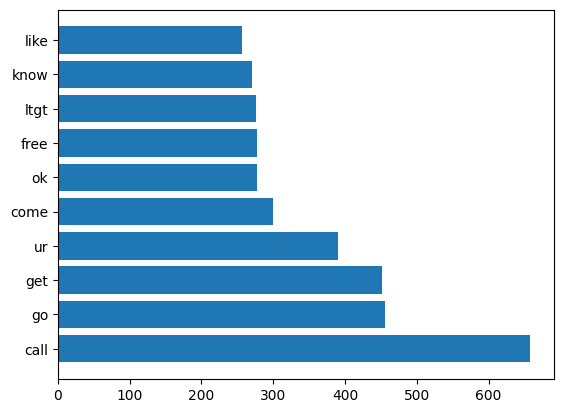

In [44]:
plt.barh(
    y=jumlah_kata['word'][0:10],
    width = jumlah_kata['count'][0:10]
)
plt.show()

In [45]:
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [46]:
from wordcloud import WordCloud

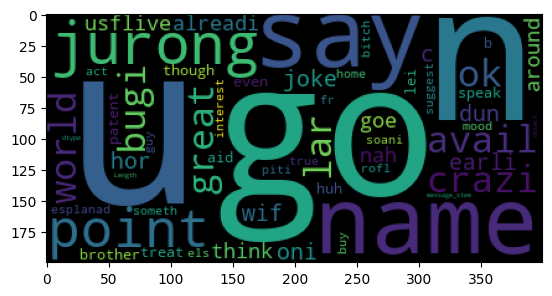

In [47]:
word_cloud = WordCloud().generate(str(df[df['label']=="ham"]['message_stem']))
plt.imshow(word_cloud)
plt.show()

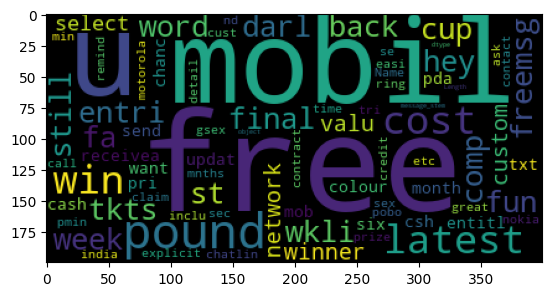

In [48]:
word_cloud = WordCloud().generate(str(df[df['label']=="spam"]['message_stem']))
plt.imshow(word_cloud)
plt.show()

length of sentence

In [49]:
df['sentence_length'] = df['message'].apply(len)

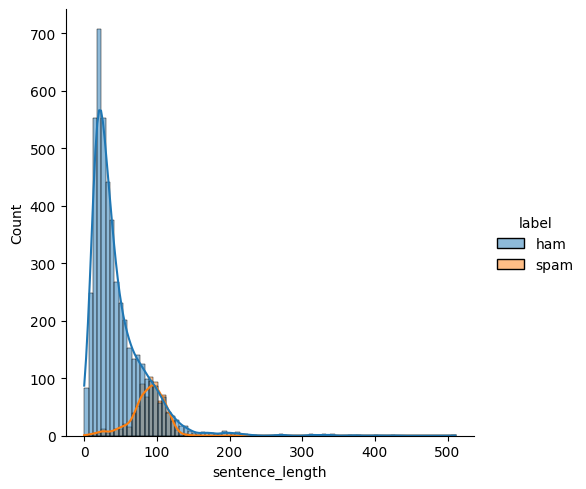

In [50]:
sns.displot(
    data = df,
    x = "sentence_length",
    hue = "label",
    kde=True
)
plt.show()

Membuat machine learning model

In [51]:
df

,label,message,message_stem,message_lemma,sentence_length
0,ham,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...,82
1,ham,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni,23
2,spam,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...,107
3,ham,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say,35
4,ham,nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though,38
...,...,...,...,...,...
5567,spam,nd time tried contact u u pound prize claim ea...,nd time tri contact u u pound prize claim easi...,nd time tried contact u u pound prize claim ea...,81
5568,ham,b going esplanade fr home,b go esplanad fr home,b going esplanade fr home,25
5569,ham,pity mood soany suggestions,piti mood soani suggest,pity mood soany suggestion,27
5570,ham,guy bitching acted like I interested buying so...,guy bitch act like i interest buy someth els n...,guy bitching acted like I interested buying so...,81


In [67]:
y = np.where(df['label']=="spam", 1, 0)
X = df['message_stem']

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
training_vectorizer = TfidfVectorizer(ngram_range=(0,2))

In [86]:
training_vectorizer.fit(X_train)
X_train = training_vectorizer.transform(X_train)
X_test = training_vectorizer.transform(X_test)

In [87]:
feature_names = training_vectorizer.get_feature_names_out()
print(feature_names)

['' 'aa' 'aa exhaust' ... 'zoom cine' 'zyada' 'zyada kisi']


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [89]:
LR_model = LogisticRegression(random_state=2020).fit(X_train, y_train)

In [90]:
y_pred = LR_model.predict(X_test)
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       957
           1       0.92      0.79      0.85       158

    accuracy                           0.96      1115
   macro avg       0.94      0.89      0.91      1115
weighted avg       0.96      0.96      0.96      1115



Hypotetical question, gimana caranya deploy untuk data teks yang kita input?

In [91]:
#proses sebuah teks dapat diklasifikasikan
# mendapatkan teks nya
# vectorize the text
# predict

In [136]:
teks_input_user = "easy loan 2025 easy accept easy approve"

In [137]:
from nltk.tokenize import word_tokenize

def preprocess_input(text_input):
    text_input = text_input.split(sep=" ")
    text_input = " ".join([x.lower() for x in text_input])
    text_input = contraction_replacement(text_input)
    text_input = remove_stopwords(text_input)
    text_input = re.sub(pattern= r'[^a-zA-Z ]', repl='', string=text_input)
    text_input = re.sub(pattern= r'\s{2,}', repl=' ', string=text_input)
    text_input = text_input.strip()

    # text_input = word_tokenize(text_input)
    text_output = " ".join([stemmer.stem(x) for x in text_input.split(sep=" ")])
    return text_output

In [138]:
text_input_model = preprocess_input(teks_input_user)
print(text_input_model)

easi loan easi accept easi approv


In [139]:
hasil_vectorize_input_user = training_vectorizer.transform([teks_input_user])

In [140]:
hasil_predict_input_user = LR_model.predict_proba(hasil_vectorize_input_user)
print(hasil_predict_input_user)

[[0.64570731 0.35429269]]
